# Part II - what are the factors that impacts whether a person can have a loan or not.
## by Abdulelah

## Investigation Overview


In my project I am interested in figure out what are the factors that ampacts whether a person can have a loan or not. 


## Dataset Overview

This [data set](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1547699802003000)
contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing) explains the 
variables in the data set.

The project objective is not expected to explore all of the features in the dataset! But focus on only exploration on about 10 or 15 of them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('prosperLoanData.csv')

col = ['Term', 
       'LoanStatus',
       'CreditGrade',
       'EstimatedEffectiveYield',
       'BorrowerRate',
       'BorrowerAPR',
       'ProsperScore',
       'ProsperRating (numeric)',
       'ProsperRating (Alpha)',
       'ListingCategory (numeric)',
       'EmploymentStatus',
       'Occupation',
       'EmploymentStatusDuration', 
       'IsBorrowerHomeowner', 
       'IncomeVerifiable', 
       'StatedMonthlyIncome', 
       'MonthlyLoanPayment',
       'Recommendations', 
       'DebtToIncomeRatio',
       'LoanOriginalAmount' ,
       'PercentFunded',
       'IncomeRange',
       'Investors',
       'BorrowerState']

loans = df[col]

## Distribution of each key feature

> the distribution of Loan status, Listing Category, Employment Status, Income Range, Homeownership, top 10 states, top 10 occupations. Also BorrowerRate and BorrowerAPR and Investors.

In [10]:
loans.columns

Index(['Term', 'LoanStatus', 'CreditGrade', 'EstimatedEffectiveYield',
       'BorrowerRate', 'BorrowerAPR', 'ProsperScore',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatus', 'Occupation',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations',
       'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded',
       'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

In [11]:
loans['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

### Income Range 
> Most borrowers have an income between 25,000 and 75,000

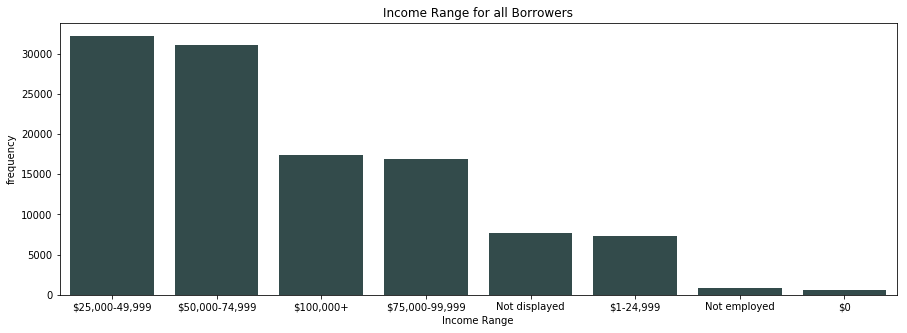

In [12]:
plt.figure(figsize = [15, 5]) 
loans = loans[loans['IncomeRange'].isnull() == False]
sns.countplot(data = loans, x = 'IncomeRange', color = 'darkslategrey',
             order = loans['IncomeRange'].value_counts().index)
plt.xlabel('Income Range')
plt.ylabel('frequency')
plt.title('Income Range for all Borrowers');

In [13]:
loans['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

### Homeownership
> half of the borrowers are home owners

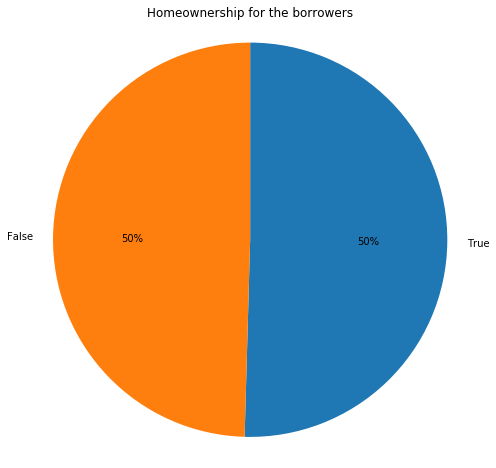

In [14]:
plt.figure(figsize = [15, 8])
sortedd = loans['IsBorrowerHomeowner'].value_counts()
plt.pie(sortedd, labels = sortedd.index, startangle = 90,
        counterclock = False, autopct = '%.0f%%');
plt.title("Homeownership for the borrowers")
plt.axis('square');

In [15]:
loans['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

### Employment Status
> Most of the borrowers are employed 

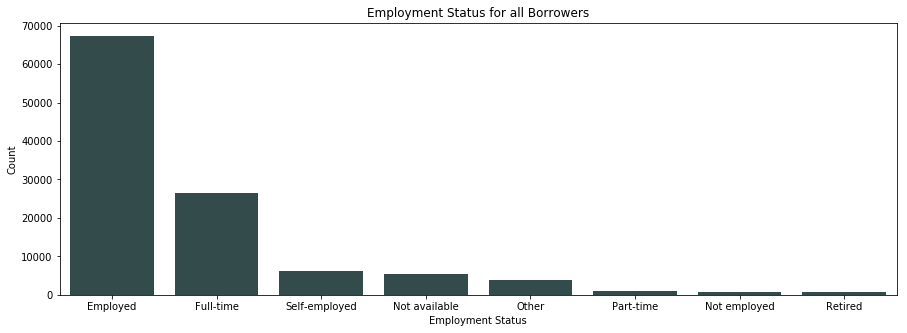

In [16]:
plt.figure(figsize = [15, 5]) 
loans = loans[loans['EmploymentStatus'].isnull() == False]
sns.countplot(data = loans, x = 'EmploymentStatus', color = 'darkslategrey',
             order = loans['EmploymentStatus'].value_counts().index)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status for all Borrowers');

### Borrower Rate & Borrower APR
> Borrower Rate and Borrower APR seemed to have a normal distribution.

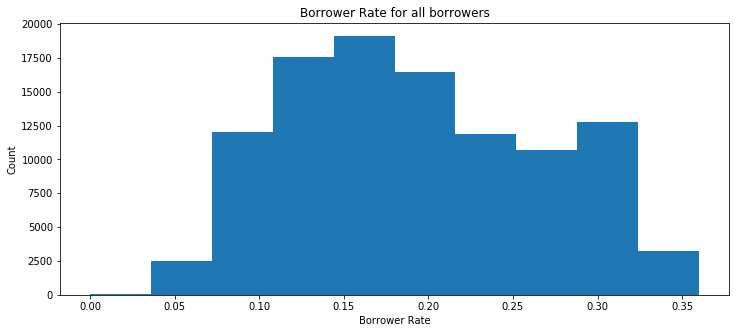

In [26]:
plt.figure(figsize = [12, 5]) 
plt.hist(data = loans, x = 'BorrowerRate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title("Borrower Rate for all borrowers");

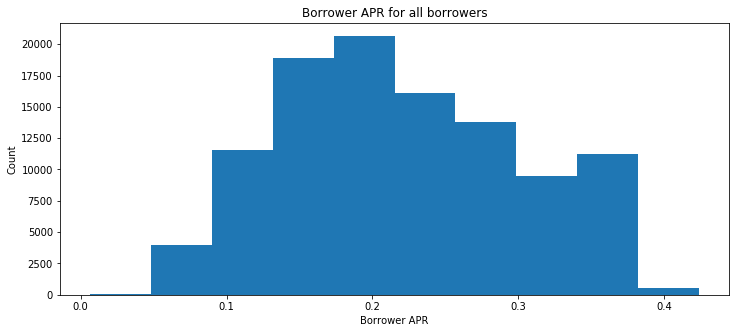

In [27]:
plt.figure(figsize = [12, 5]) 
plt.hist(data = loans, x = 'BorrowerAPR')
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title("Borrower APR for all borrowers");

### Loan Original Amount
> we have right-skewed distribution before the log, after that we can see that we have a normal distribution! It's interesting actually! 

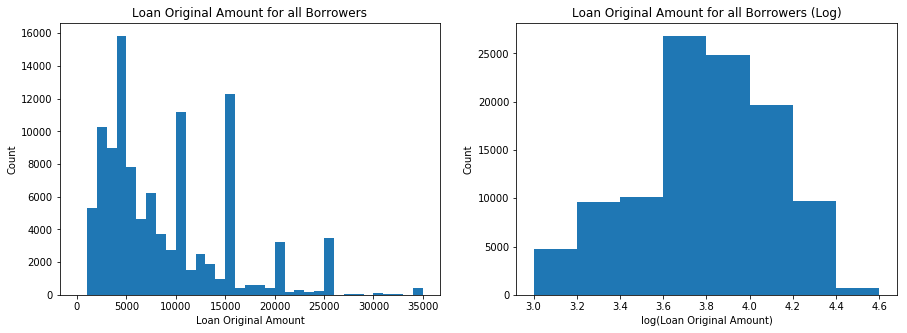

In [28]:
plt.figure(figsize = [15, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loans['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.title("Loan Original Amount for all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loans['LoanOriginalAmount'])
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Loan Original Amount)')
plt.ylabel('Count')
plt.title("Loan Original Amount for all Borrowers (Log)");

loans['LoanOriginalAmount_log'] = np.log10(loans['LoanOriginalAmount'])

## Relationship among key features (Bivariate)

> The relationship between numerical features, categorical features, and both numerical adn categorical features.

In [30]:
numeric = ['BorrowerRate',
           'BorrowerAPR',
           'LoanOriginalAmount',
           'Investors',
           'LoanOriginalAmount_log',
           'Investors_log',
           'MonthlyLoanPayment',
           'StatedMonthlyIncome']

### Between Numerical Features

> BorrowerAPR and BorrowerRate are highly correlated, also LoanOriginalAmount with MonthlyLoanPayment are also highly correlated.

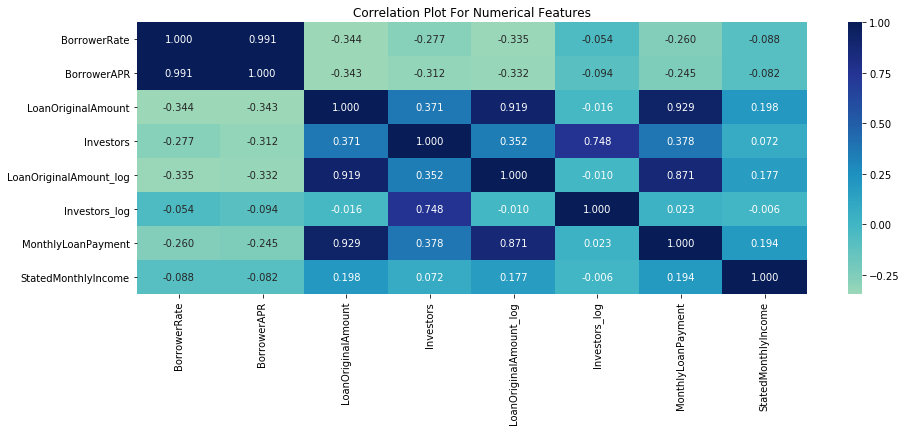

In [31]:
#correlation plot for numerical features
plt.figure(figsize = [15, 5])
sns.heatmap(loans[numeric].corr(), annot = True, fmt = '.3f',
           cmap = 'YlGnBu', center = 0)
plt.title('Correlation Plot For Numerical Features');

In [32]:
Category = ['Term',
            'LoanStatus',
            'ListingCategory (numeric)', 
            'EmploymentStatus',
            'IncomeRange', 
            'Occupation', 
            'BorrowerState',
            'IsBorrowerHomeowner']

### Between Employment Status & Income Range

> Employment Status and Income Range are highly correlated. So Employed borrowers has the highest income.

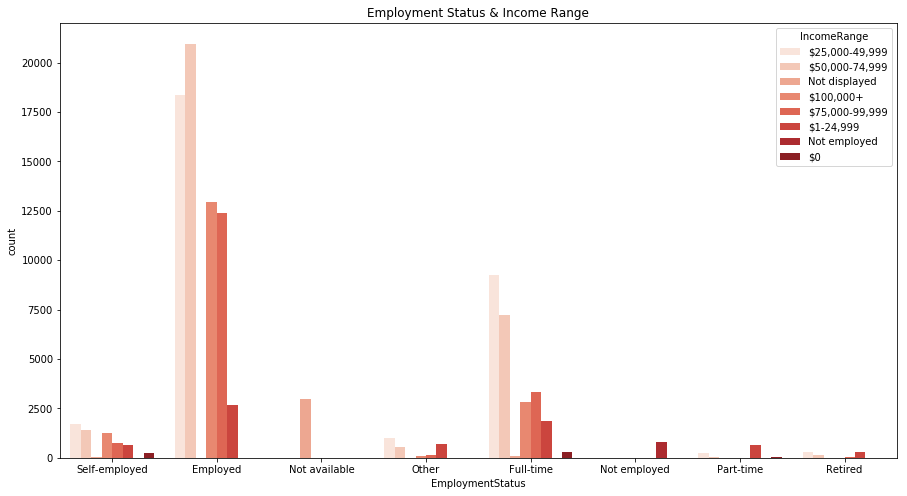

In [33]:
plt.figure(figsize = [15, 8])
sns.countplot(data = loans, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Reds')
plt.title('Employment Status & Income Range');

### Between Employment Status & Loan Amount

> most of the borrowers have a loan with less than 5,000 whatever there employment status was. Also borrowers who are employed or self-employed can have a loans with more than 10,000.

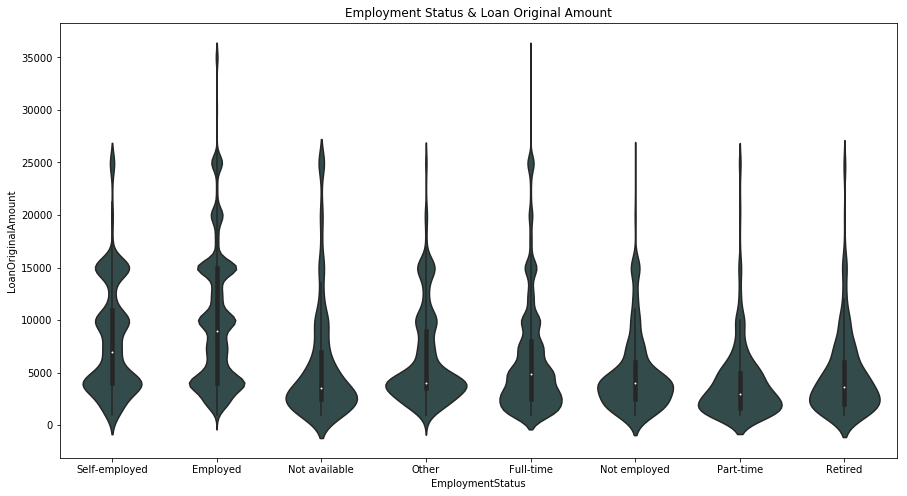

In [34]:
plt.figure(figsize = [15, 8])
sns.violinplot(data = loans, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = 'darkslategrey')
plt.title('Employment Status & Loan Original Amount');

### Between Income Range & Loan Amount

> it also proves our insight above that most of the borrowers has a loans less than 5,000 

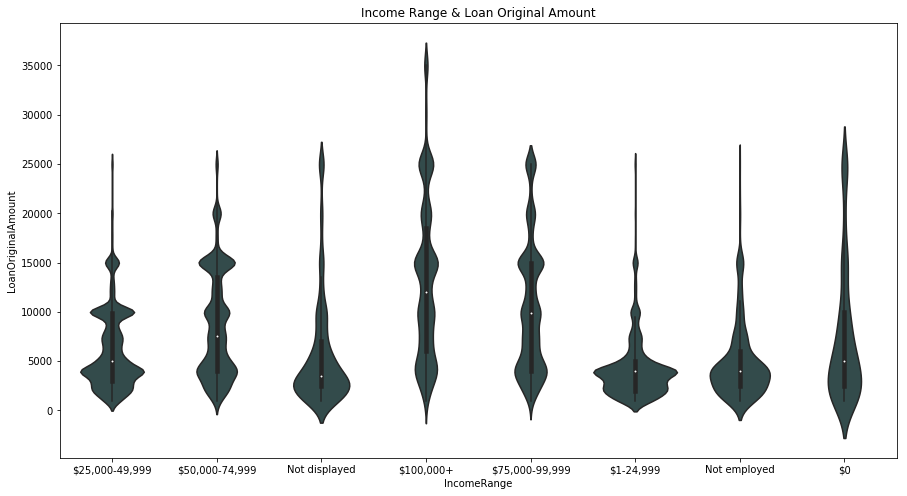

In [35]:
plt.figure(figsize = [15, 8])
sns.violinplot(data = loans, x = 'IncomeRange', y = 'LoanOriginalAmount', color = 'darkslategrey')
plt.title('Income Range & Loan Original Amount');

### Between Homeownership & Loan Amount

> home owners borrowers are more likely to have larger loan amount than borrowers that they are not home owners.

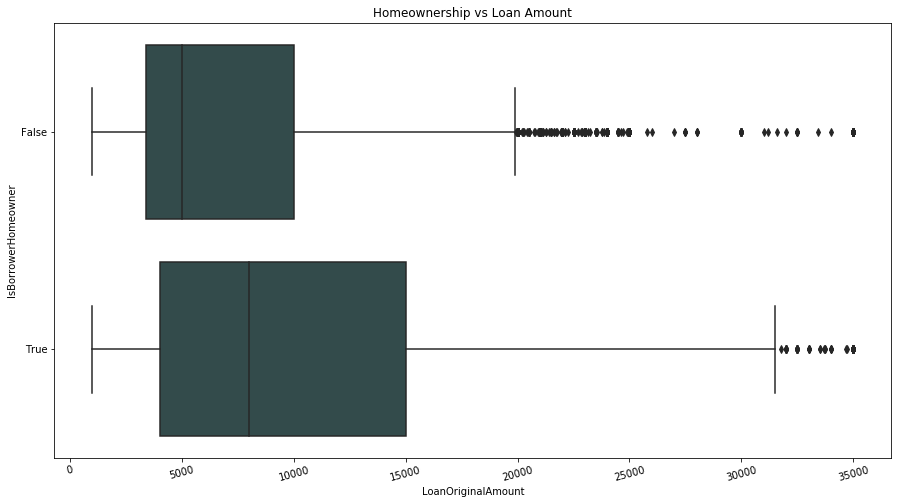

In [36]:
plt.figure(figsize = [15, 8])
ax = sns.boxplot(data = loans, x = 'LoanOriginalAmount', y = 'IsBorrowerHomeowner', orient='h', color = 'darkslategrey')
plt.xticks(rotation = 15);
plt.title('Homeownership vs Loan Amount');

## Relationship among key features (Multivariate)

### Between Homerownership & Employment Status & Loan Amount

> home owner borrowers and employed are having highest amount of a loan, and borrowers with no home to own still having larger amount of loans.

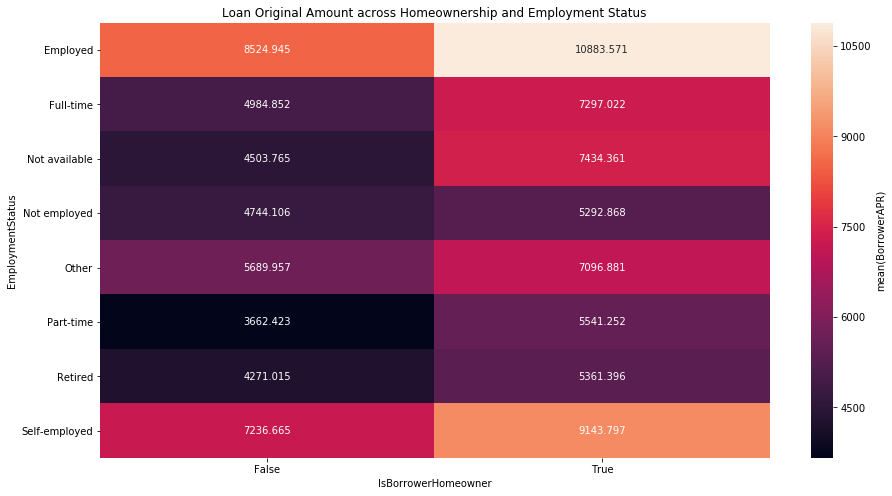

In [46]:
plt.figure(figsize = [15, 8])
means = loans.groupby(['IsBorrowerHomeowner', 'EmploymentStatus']).mean()['LoanOriginalAmount']
means = means.reset_index(name = 'LoanOriginalAmount_avg')
means = means.pivot(index = 'EmploymentStatus', columns = 'IsBorrowerHomeowner',
                            values = 'LoanOriginalAmount_avg')
sns.heatmap(means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Loan Original Amount across Homeownership and Employment Status');

### Between Loan Amount & Homeiwnership & Employment Status

> the plot shows that home owner borrowers and employed are most likely to have a higher amount

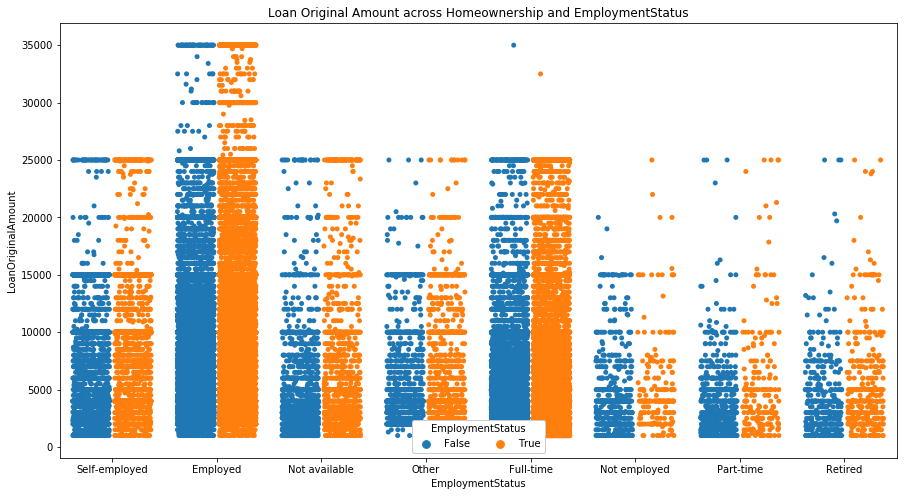

In [47]:
plt.figure(figsize = [15, 8])
ax1 = sns.stripplot(data = loans, 
                    x = 'EmploymentStatus', 
                    y = 'LoanOriginalAmount', 
                    hue = 'IsBorrowerHomeowner',
                    jitter = 0.35, 
                    dodge = True)
ax1.legend(loc = 8, ncol = 3, framealpha = 1, title = 'EmploymentStatus')
plt.title('Loan Original Amount across Homeownership and EmploymentStatus');

### Between Employment Status & Borrower Rate & Homeownership

> Home owner borrowers have lower rate whatever the employment status is expect unemployed borrowers. home owner and unemployed borrowersare most likely to have higher rate than who's not homeowners.

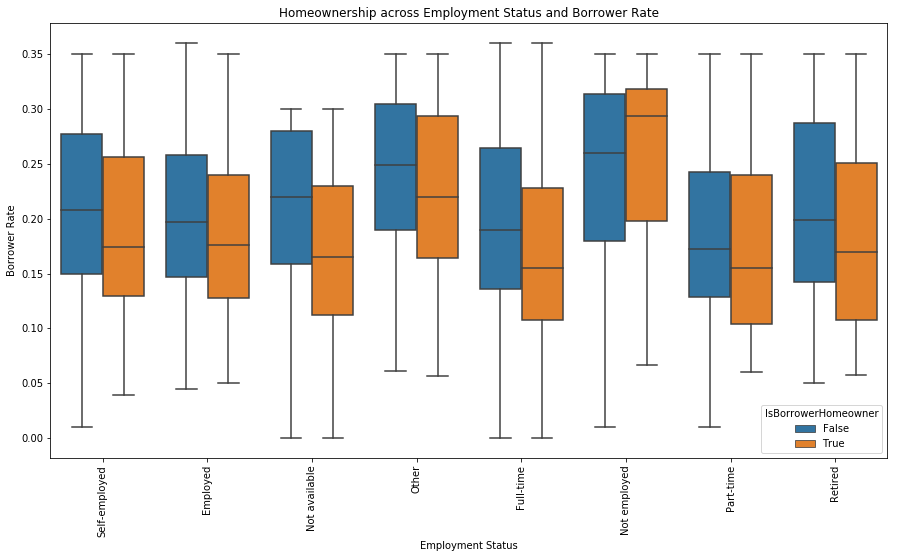

In [48]:
plt.figure(figsize = [15, 8])
sns.boxplot(data = loans,
            x = 'EmploymentStatus', 
            y = 'BorrowerRate', 
            hue = 'IsBorrowerHomeowner')
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.xticks(rotation = 90)
plt.title('Homeownership across Employment Status and Borrower Rate');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local 
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 963820 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/